<a href="https://colab.research.google.com/github/ziedjouini/machine-learning/blob/main/DecisionTrees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Decision Trees
Within this challenge, we're going to use decision trees in both a classification sense and a regression sense and visualize each of these representations. In this challenge, we will be using the `mpg` dataset.

## Regression Trees

In [ ]:
# Load in the necessary libraries and the dataset
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import accuracy_score, r2_score
import matplotlib.pyplot as plt

data = sns.load_dataset("mpg")

# Drop the rows with missing values
# Drop the "name" column
# Transform the "origin" column to represent the following:
#   USA = 0, Japan = 1, Europe = 2

# INSERT CODE HERE

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [ ]:
data.dropna(inplace=True)
data.drop(columns=['name'],inplace=True)



In [ ]:
data

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,18.0,8,307.0,130.0,3504,12.0,70,usa
1,15.0,8,350.0,165.0,3693,11.5,70,usa
2,18.0,8,318.0,150.0,3436,11.0,70,usa
3,16.0,8,304.0,150.0,3433,12.0,70,usa
4,17.0,8,302.0,140.0,3449,10.5,70,usa
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa
394,44.0,4,97.0,52.0,2130,24.6,82,europe
395,32.0,4,135.0,84.0,2295,11.6,82,usa
396,28.0,4,120.0,79.0,2625,18.6,82,usa


In [ ]:
data.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin'],
      dtype='object')

In [ ]:
data['origin'].value_counts()

usa       245
japan      79
europe     68
Name: origin, dtype: int64

In [ ]:
data['origin']=data['origin'].factorize()[0]
data

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,18.0,8,307.0,130.0,3504,12.0,70,0
1,15.0,8,350.0,165.0,3693,11.5,70,0
2,18.0,8,318.0,150.0,3436,11.0,70,0
3,16.0,8,304.0,150.0,3433,12.0,70,0
4,17.0,8,302.0,140.0,3449,10.5,70,0
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,0
394,44.0,4,97.0,52.0,2130,24.6,82,2
395,32.0,4,135.0,84.0,2295,11.6,82,0
396,28.0,4,120.0,79.0,2625,18.6,82,0


In [ ]:
# Split into train and test splits using the "mpg" column as target, random state of 42 and a test size of 20%
# INSERT CODE HERE

X=data[['cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin']]
y=data['mpg']

X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.2)


In [ ]:
len(X_train)

313

In [ ]:
# Fit a decision tree
# INSERT CODE HERE
from sklearn.tree import DecisionTreeRegressor
modelDTR=DecisionTreeRegressor()
modelDTR.fit(X_train,y_train)

DecisionTreeRegressor()

In [ ]:
# Predict on the xtest set
# INSERT CODE HERE
modelDTR.predict(X_test)

array([23. , 19. , 31. , 33. , 27.9, 29. , 11. , 31.5, 18. , 31. , 15. ,
       16.5, 17.5, 29. , 16.5, 27. , 20. , 32.4, 36.4, 37. , 20.3, 36. ,
       31. , 18. , 31. , 28. , 19. , 18. , 26. , 25. , 16. , 20.2, 23.9,
       28. , 14. , 31. ,  9. , 23. , 14. , 13. , 14. , 28. , 34. , 26. ,
       16. , 11. , 18. , 44.3, 25. , 33. , 14. , 21. , 21. , 37. , 38. ,
       16. , 22. , 19. , 24. , 23. , 12. , 22. , 28.8, 22. , 24. , 26. ,
       24.5, 33. , 23.9, 14. , 25. , 13. , 20.3, 19. , 20.5, 24. , 13. ,
       18. , 24. ])

In [ ]:
# Print out the R2 score.
# INSERT CODE HERE
print("score train : ",modelDTR.score(X_train,y_train))
print("score test : ",modelDTR.score(X_test,y_test))

score train :  1.0
score test :  0.7492588471530551


In [ ]:
# Print each feature with importance %
# INSERT CODE HERE
modelDTR.feature_importances_

array([0.00379006, 0.63069217, 0.17284624, 0.063356  , 0.02164244,
       0.10379977, 0.00387331])

In [ ]:
X.columns

Index(['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration',
       'model_year', 'origin'],
      dtype='object')

In [ ]:
for (feature,importance) in zip(X.columns,modelDTR.feature_importances_):
  print(feature," : ",importance*100)

cylinders  :  0.37900626231046175
displacement  :  63.06921724079542
horsepower  :  17.284624333835357
weight  :  6.3356003800827745
acceleration  :  2.164244051579422
model_year  :  10.37997654015033
origin  :  0.38733119124622284


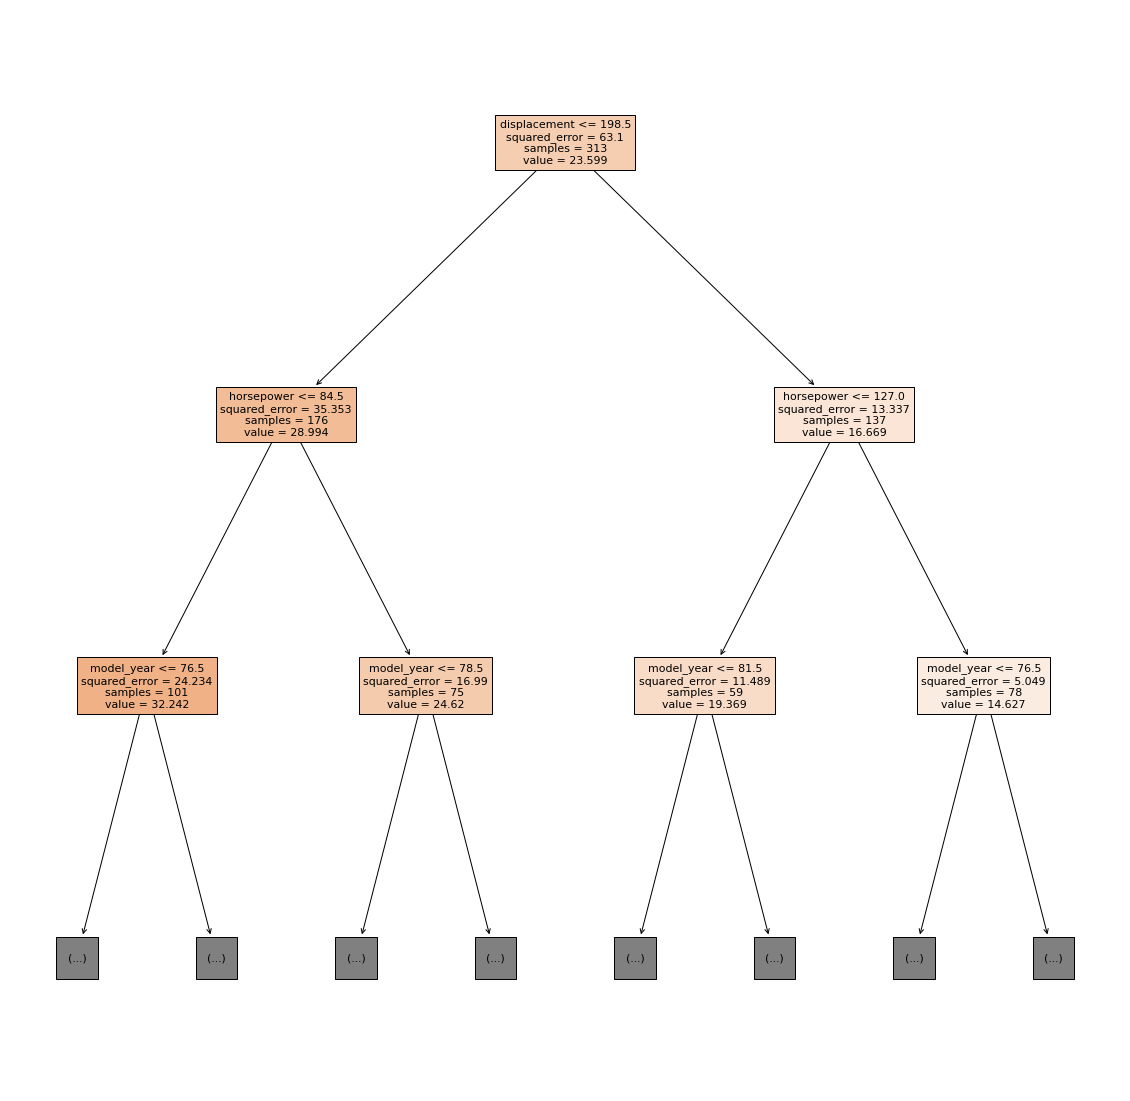

In [ ]:
# Plot the results
# Use column names as feature names and a max_depth of only 2
# INSERT CODE HERE
from sklearn.tree import plot_tree
plt.figure(figsize=(20,20))
plot_tree(modelDTR,filled=True,max_depth=2,
          feature_names=X.columns)
plt.show()

## Classification Trees

In [ ]:
# Load in the Penguins dataset
data_2 = sns.load_dataset('penguins')

# Drop rows with missing values
# Turn the species column into numeric
# Specifically, Adelie = 0, Chinstrap = 1, and Gentoo = 2

# Turn the island column into numeric
# Specifically, Torgersen = 0, Biscoe = 1, Dream = 2

# INSERT CODE HERE


In [ ]:
data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [ ]:
data_2.dropna(inplace=True)
data_2['species_cat']=data_2['species'].factorize()[0]

In [ ]:
data_2

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,species_cat
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male,0
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female,0
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female,0
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female,0
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male,0
...,...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,Female,2
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female,2
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male,2
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female,2


In [ ]:
data_2['island_cat']=data_2['island'].apply(lambda x: 0 if x=='Torgersen' else ( 1 if x=='Biscoe' else 2))

data_2

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,species_cat,island_cat
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male,0,0
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female,0,0
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female,0,0
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female,0,0
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male,0,0
...,...,...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,Female,2,1
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female,2,1
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male,2,1
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female,2,1


In [ ]:
# Using a random state of 42 and a test size of 0.20, as well as "sex" as the output, split in training and testing sets
# INSERT CODE HERE
X_2=data_2[['bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'species_cat', 'island_cat']]
y_2=data_2['sex']
X_2_train,X_2_test,y_2_train,y_2_test=train_test_split(X_2,y_2,random_state=42,test_size=0.2)

In [ ]:
# Using a random state of 42, fit the classification tree.
# INSERT CODE HERE
from sklearn.tree import DecisionTreeClassifier
modelDTC=DecisionTreeClassifier()
modelDTC.fit(X_2_train,y_2_train)


DecisionTreeClassifier()

In [ ]:
# Print the predictions on the test set
# INSERT CODE HERE
modelDTC.predict(X_2_test)



array(['Female', 'Female', 'Male', 'Female', 'Male', 'Female', 'Male',
       'Female', 'Male', 'Male', 'Male', 'Female', 'Female', 'Female',
       'Female', 'Female', 'Female', 'Female', 'Male', 'Female', 'Male',
       'Female', 'Male', 'Male', 'Female', 'Female', 'Female', 'Female',
       'Female', 'Male', 'Female', 'Male', 'Male', 'Female', 'Male',
       'Female', 'Male', 'Female', 'Female', 'Female', 'Female', 'Female',
       'Female', 'Female', 'Female', 'Female', 'Male', 'Male', 'Male',
       'Female', 'Female', 'Male', 'Female', 'Female', 'Male', 'Male',
       'Female', 'Male', 'Male', 'Male', 'Male', 'Male', 'Female',
       'Female', 'Female', 'Male', 'Female'], dtype=object)

In [ ]:
#pd.concat([y_2_test,X_2_test],axis=1)

In [ ]:
# Print the accuracy score for the predictions
# INSERT CODE HERE
modelDTC.score(X_2_train,y_2_train)

1.0

In [ ]:
modelDTC.score(X_2_test,y_2_test)

0.8656716417910447

In [ ]:
# Print each feature with importance %
# INSERT CODE HERE
for feature,importance in zip(X_2.columns,modelDTC.feature_importances_):
  print(feature," = ",importance)

bill_length_mm  =  0.06729395909877803
bill_depth_mm  =  0.4753228596634157
flipper_length_mm  =  0.0523833786231884
body_mass_g  =  0.39044288836341007
species_cat  =  0.004517663043478257
island_cat  =  0.010039251207729466


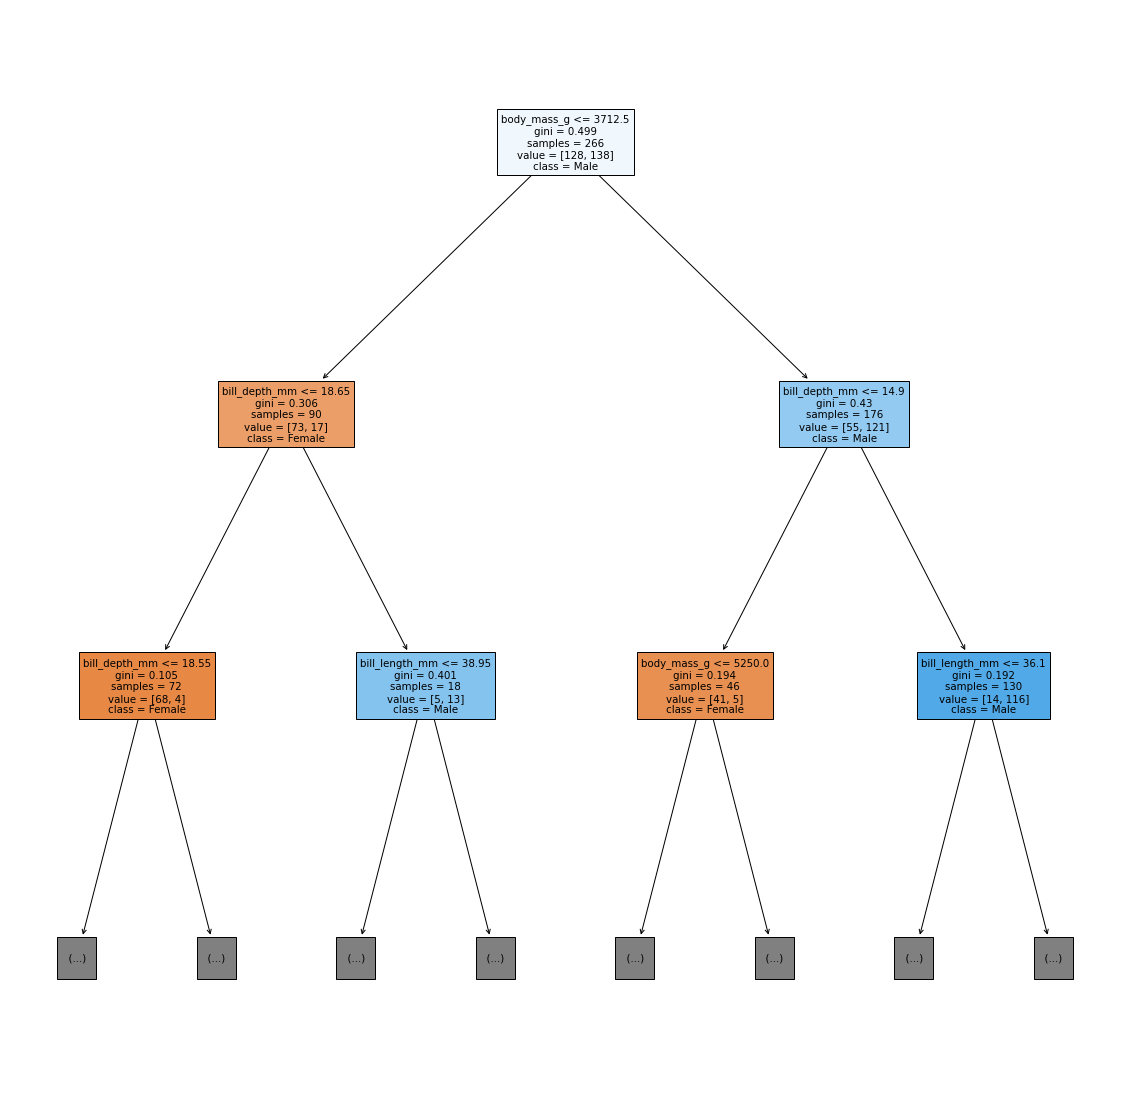

In [ ]:
# Plot the results
# Use column names as feature names and a max_depth of only 2
# INSERT CODE HERE

from sklearn.tree import plot_tree
plt.figure(figsize=(20,20))
plot_tree(modelDTC,filled=True,max_depth=2,
          feature_names=X_2.columns,
          class_names=modelDTC.classes_)
plt.show()


# Effects of Changing the Maximum Depth
In this section, we're going to see how changing the max_depth, which is one of the most important hyperparameters when it comes to decision trees, plays a part in the prediction accuracy.

*** This exercise is only done for you to see how big of an impact choosing the correct max_depth is!*** Choosing the correct max_depth (or any other hyperparameter for that matter) is typically done using cross validation or a more advanced technique (Grid Search, Random Search, Bayesian Optimization).


Using the above dataset, fit and predict the train and test sets using a max_depth from 1 to 10. For example, within the first iteration, you would fit the xtrain and ytrain datasets using max_depth=1, predict the xtest using this model, and then record the accuracy. On the next iteration, the max_depth would then be 2, etc.

In [ ]:
# Using a random state of 42, fit multiple decision trees with various max depths.
# Record these accuracies in a list (i.e. list_of_accuracies.append(accuracy))
list_of_accuracies = []
for i in range(1, 11):
  # INSERT CODE HERE
  modelDTC=DecisionTreeClassifier(random_state=42,max_depth=i)
  modelDTC.fit(X_2_train,y_2_train)
  accurary=modelDTC.score(X_2_test,y_2_test)
  list_of_accuracies.append(accurary)

list_of_accuracies

[0.7014925373134329,
 0.8208955223880597,
 0.835820895522388,
 0.8507462686567164,
 0.8507462686567164,
 0.8507462686567164,
 0.8656716417910447,
 0.8805970149253731,
 0.8805970149253731,
 0.8805970149253731]

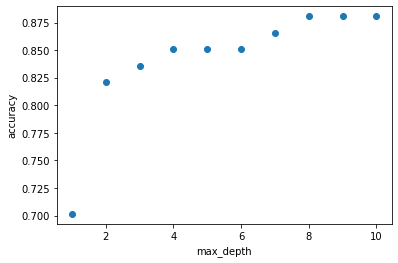

In [ ]:
# Plot these accuracies using matplotlib with the accuracies on the y-axis and the max_depth on the x-axis.
# INSERT CODE HERE
plt.scatter(x=[i for i in range(1,11)],y=list_of_accuracies)

plt.xlabel("max_depth")
plt.ylabel("accuracy")
plt.show()